<center>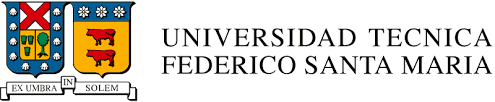</center>



<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 INTRODUCCIÓN AL APRENDIZAJE AUTOMÁTICO - 2023-1 </h1>

<H3 align='center'> Tarea 2  </H3>
<hr style="height:2px;border:none"/>

**Temas**
* Manipulaciones en pandas y numpy, imputación de datos y preprocesamientos
* Feature Engineering
* Regresión
* Clasificación
* Árboles y Bosques de Regresión
* Máquinas de ensamblado
* Redes Neuronales


**Formalidades**
* Equipos de trabajo de 3 personas (*Los estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Las preguntas que deben responder se encuentran especificadas explícitamente con letras, ejemplo a) b) c), por lo tanto cualquier pregunta que se encuentre incompleta será penalizada con descuento del puntaje. Recuerde que los códigos presentes en este documento son solo una guía de referencia, por lo tanto no necesariamente funcionan, usted debe mostrar todos sus conocimientos aprendidos a lo largo de la carrera para que su código funcione como se espera. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán.
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico de los ayudantes (<sebastian.sanchezl@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>). Especificar el siguiente asunto: [INF-398-2023-1 Tarea 2]. Invitar como colaborador a los usuarios de github "ssanchezl" para poder acceder al repositorio en caso de ser privado.

* Fecha de presentaciones 30 de Junio, en horario de clases.
* Fecha de entrega: 01 de Julio. Hora límite de entrega: 12:00 p.m. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.

<hr style="height:2px;border:none"/>

Importe las librerías necesarias para cargar explorar el conjunto de datos.

In [169]:
import os
from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, mean_absolute_error, mutual_info_score, accuracy_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.python.keras import Model
from keras.activations import relu, softmax, tanh, sigmoid
from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from keras.callbacks import EarlyStopping



# 1. Predicción de la calidad de vinos

Los árboles de regresión, también conocidos como árboles de decisión para regresión, son un tipo de algoritmo de aprendizaje supervisado que se utiliza para predecir valores numéricos. Son una potente herramienta para tareas de regresión y ofrecen varias ventajas y consideraciones.

<center><img src=https://cdn.shopify.com/s/files/1/1277/3667/files/an-essential-guide-1_480x480.png?v=1674719515></center>


Los conjuntos de datos provienen del UCI Machine Learning Repository. Estos conjuntos de datos están relacionados con las variantes tintas y blancas del vino portugués "Vinho Verde".

Estos dos conjuntos de datos contienen varias propiedades químicas de distintos vinos, como la acidez, el pH, el contenido de alcohol, etc. La variable objetivo es la calidad del vino la cual se puntúa del 0 al 10. Puede considerarse una tarea de clasificación o regresión en la que las clases están ordenadas y no balanceadas. Para esta pregunta nos centraremos en la tarea de regresión.

Variables de entrada (basadas en pruebas físico-químicas):
* fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol
* tipo

Variable objetivo (basadas en datos sensoriales):
* quality



Para obtener más información sobre este conjunto de datos, revise el siguiente link: https://www.kaggle.com/datasets/rajyellow46/wine-quality.

## 1.1 Manipulación y exploración del conjunto de datos

Lo primero es obtener los datos, para esto se pueden descargar los archivos directamente de la página de Kaggle a través del link de la descripción de arriba.

Aplique lo aprendido en la tarea 1 y obtenga los datos de la forma que le sea más conveniente siempre y cuando estos sean los del link de la descripción.

In [170]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"miguelvergarap","key":"91eb81b48344cf0a6b7a9699b2156c7e"}'}

In [171]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [172]:
!kaggle datasets download -d rajyellow46/wine-quality

wine-quality.zip: Skipping, found more recently modified local copy (use --force to force download)


In [173]:
!unzip /content/wine-quality.zip

Archive:  /content/wine-quality.zip
replace winequalityN.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: winequalityN.csv        


In [174]:
df = pd.read_csv('/content/winequalityN.csv')

### 1.1.1 Exploración del conjunto de datos

Explore el conjunto de datos y responda brevemente las siguientes preguntas:

> a) ¿Cuáles variables poseen valores numéricos y cuáles poseen valores categóricos?

La única variable categórica es: type

Las variables numéricas son: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality

> b) ¿Existen datos faltantes, si es así en qué atributos faltan datos y cuantos faltan?

Si faltan datos, siendo las categorias y cantidad de datos faltantes:

fixed acidity - 10

volatile acidity - 8

citric acid - 3

residual sugar - 2

chlorides - 2

pH - 9

sulphates - 4

> c) ¿Qué técnicas conoce para rellenar los datos faltantes de los atributos del dataset? (si no conoce ninguna investigue al menos 2)

Una técnica que se puede usar para esto es obtener el valor promedio de aquellos valores en la columna que no sean nulos, y rellenar con este los espacios sin valor de esta columna

Otra opción es realizar forward fill, en la cual los valores NaN son remplazados por el valor de la fila anterior (Si este también es NaN, se siguen revisando filas anteriores hasta encontrar una con un valor numérico).

En caso de que el primer valor sea NaN, causando que no se vea afectado por forward fill, se puede aplicar posteriormente backward fill, el cual en lugar de filas anteriores, revisa filas posteriores.

In [175]:
def datainfo(data):
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100
    return temp_ps

datainfo(df)

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
type,object,6497,2,0,0.000000
fixed acidity,float64,6487,106,10,0.153917
volatile acidity,float64,6489,187,8,0.123134
citric acid,float64,6494,89,3,0.046175
residual sugar,float64,6495,316,2,0.030783
chlorides,float64,6495,214,2,0.030783
free sulfur dioxide,float64,6497,135,0,0.000000
total sulfur dioxide,float64,6497,276,0,0.000000
density,float64,6497,998,0,0.000000
pH,float64,6488,108,9,0.138525


### 1.1.2 Exploración de Features

En problemas de regresión, el desbalance de la variable objetivo se refiere a una distribución desigual de los valores de la variable objetivo en el conjunto de datos. Esto significa que hay una presencia significativa de valores en una clase o rango de valores en comparación con otras clases o rangos de valores. Considerando lo anterior responda las siguientes preguntas:

> a) Grafique histogramas y box plots de cada variable y comente acerca de la distribución de las características y de la variable objetivo

> b) ¿Considera que están *balanceados* los valores de la variable objetivo?

No, ya que en el gráfico se puede ver como la cantidad de vinos con un valor de calidad 6 supera desproporcionadamente a aquellos un valor de calidad de 3 y 9, viendo que incluso siguen una distribución similar a una distribución normal

> c) ¿Cómo afecta el desbalance en problemas de regresión en términos de la predicción y de la evaluación de un modelo?

Esta puede causar problemas en el modelo, haciendo que haya un mayor sesgo a realizar preddiciónes que resulten en la variable objetivo mayoritaria, evitando que se detecten correctamente aquellos casos en que el valor correcto fuera uno que se encuentra poco representando, e incluso causando que parezcan más precisos de lo que son realmente, ya que si por ejemplo se tiene una proporción 90/10 de la variable objetivo, este va a tener un 90% de precisión si es que para cada predicción siempre retorna el valor objetivo mayoritario, independientemente del resto de características usadas para realizar la predicción.


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

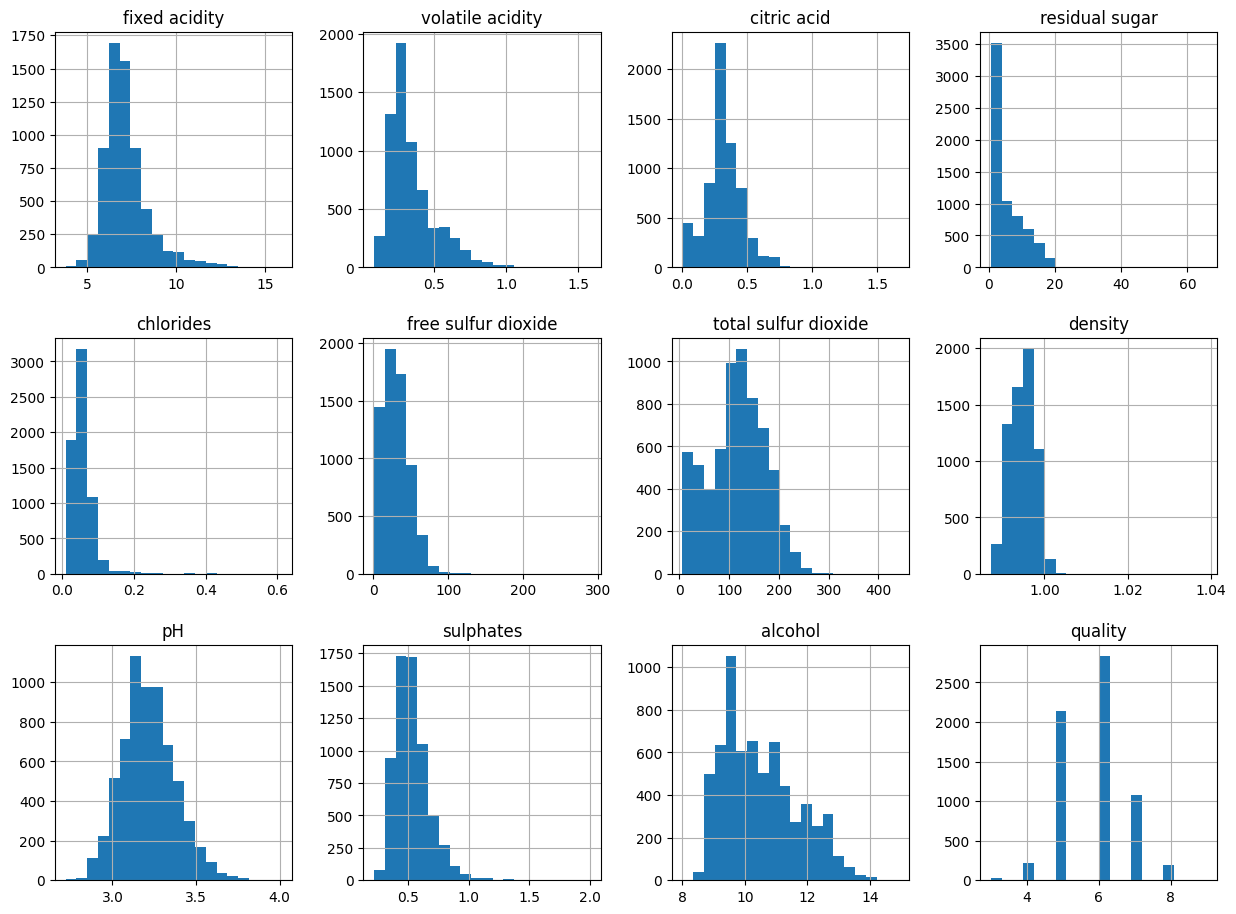

In [176]:
df.hist(figsize=(15,15), layout=(4,4), bins=20)

fixed acidity              Axes(0.125,0.747241;0.133621x0.132759)
volatile acidity        Axes(0.285345,0.747241;0.133621x0.132759)
citric acid              Axes(0.44569,0.747241;0.133621x0.132759)
residual sugar          Axes(0.606034,0.747241;0.133621x0.132759)
chlorides               Axes(0.766379,0.747241;0.133621x0.132759)
free sulfur dioxide        Axes(0.125,0.587931;0.133621x0.132759)
total sulfur dioxide    Axes(0.285345,0.587931;0.133621x0.132759)
density                  Axes(0.44569,0.587931;0.133621x0.132759)
pH                      Axes(0.606034,0.587931;0.133621x0.132759)
sulphates               Axes(0.766379,0.587931;0.133621x0.132759)
alcohol                    Axes(0.125,0.428621;0.133621x0.132759)
quality                 Axes(0.285345,0.428621;0.133621x0.132759)
dtype: object

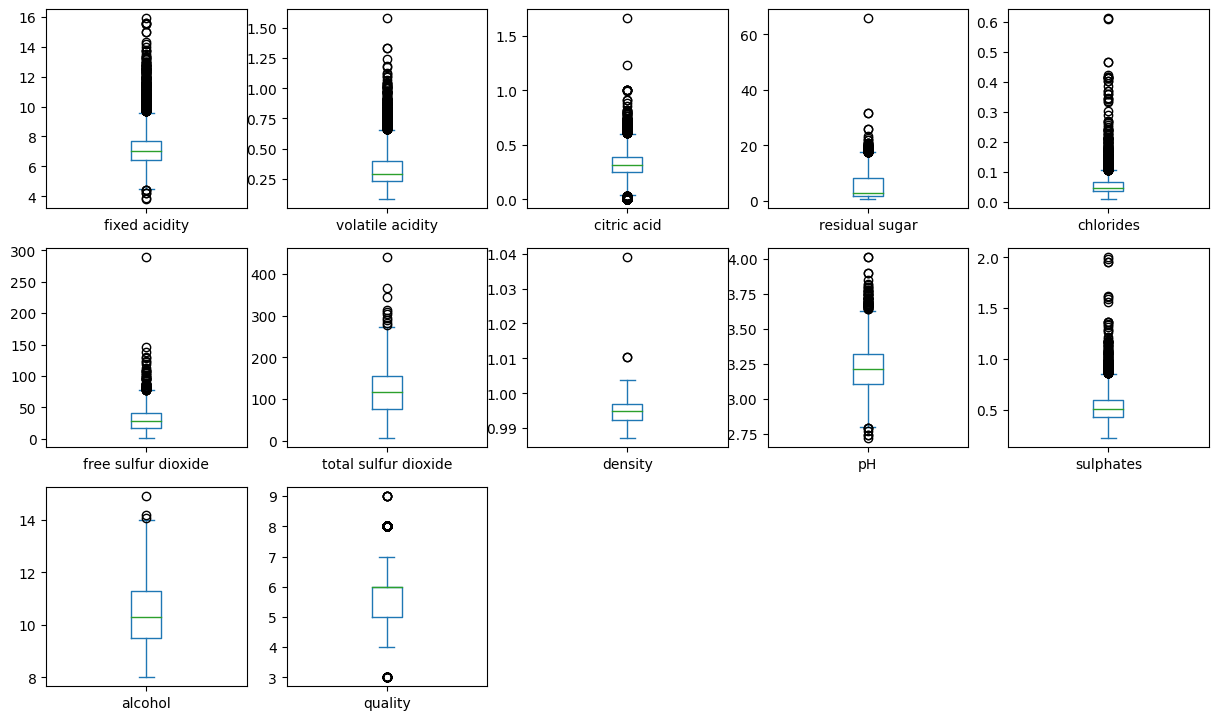

In [177]:
# buscar outliers con boxplots
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

<ipython-input-178-c65c2788c5be>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True,cmap = 'coolwarm')


<Axes: >

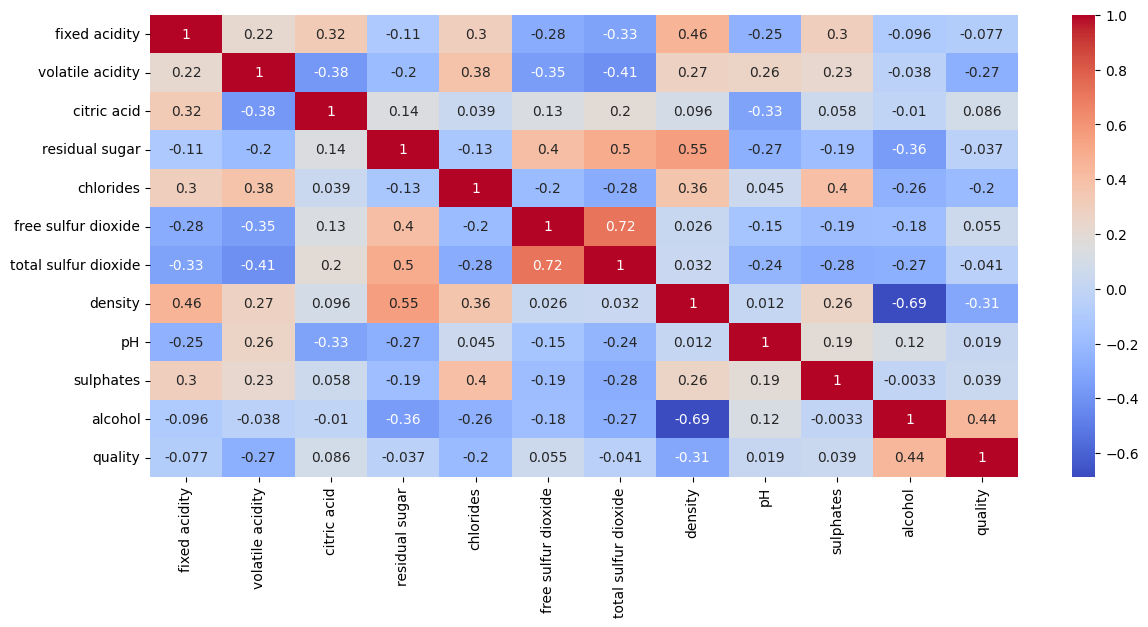

In [178]:
plt.figure(figsize=[14,6])
sns.heatmap(df.corr(), annot = True,cmap = 'coolwarm')

In [179]:
df = pd.get_dummies(df,drop_first=True)

In [180]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


### 1.1.3 Separación de conjuntos

> a) Separe el conjunto entre variables características y variable objetivo.

> b) Separe el conjunto de datos en un conjunto de entrenamiento y conjunto de prueba, utilizando una proporción 80%-20% respectivamente.

> c) Una vez separado los conjuntos, obtenga la media de cada variable con datos faltantes en el conjunto de **entrenamiento** y reemplace los valores faltantes (NaN) de ambos conjuntos (entrenamiento y prueba) con dicha media.

In [181]:
X = df.drop(['quality'], axis =1)

In [182]:
y = df['quality']

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify = y)

In [184]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())

> d) Estandarice las variables categóricas numéricas no binarias, es decir, todas excepto el tipo de vino y la variable objetivo.

In [185]:
X_scaler = preprocessing.StandardScaler()
y_scaler = preprocessing.StandardScaler()

cols_to_normalize = ['fixed acidity',
                     'volatile acidity',
                     'citric acid',
                     'residual sugar',
                     'chlorides',
                     'free sulfur dioxide',
                     'total sulfur dioxide',
                     'density',
                     'pH',
                     'sulphates',
                     'alcohol']

scaled_features = X_train.copy()
features = scaled_features[cols_to_normalize]
X_scaler.fit(features.values)
features = X_scaler.transform(features.values)

X_train[cols_to_normalize] = features
#y_train = ?

scaled_features = X_test.copy()
features = scaled_features[cols_to_normalize]
features = X_scaler.transform(features.values)
X_test[cols_to_normalize] = features

e) Grafique la relevancia de cada variable con respecto a la variable objetivo utilizando la información mutua entre ambas, en otras palabras: MutualInformation($x_i,y$) siendo $x_i$ la $i$-ésima variable.

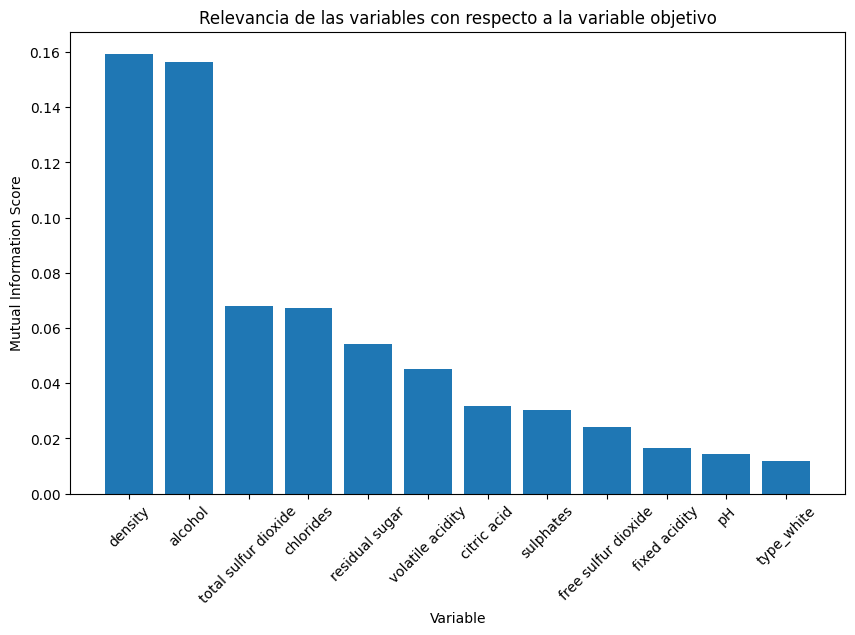

In [186]:
mi_scores = mutual_info_classif(X_train, y_train)

mi_scores_df = pd.DataFrame({'Variable': X_train.columns, 'Mutual Information': mi_scores})

mi_scores_df = mi_scores_df.sort_values(by='Mutual Information', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(mi_scores_df['Variable'], mi_scores_df['Mutual Information'])
plt.xlabel('Variable')
plt.ylabel('Mutual Information Score')
plt.title('Relevancia de las variables con respecto a la variable objetivo')
plt.xticks(rotation=45)
plt.show()

> f) Cree un segundo conjunto quitando las características que menos aportan información según lo observado en su gráfico de la pregunta anterior. El número de características a quitar es algo que usted deberá escoger y argumentar por qué lo escogió. En adelante al conjunto con todas las variables lo llamaremos conjunto $\textit{A}$ y al nuevo conjunto creado con las características quitadas lo llamaremos conjunto $\textit{B}$.

In [187]:
X_train_b = X_train.drop(['pH', 'type_white', 'fixed acidity', 'sulphates'], axis =1)
X_test_b = X_test.drop(['pH', 'type_white', 'fixed acidity', 'sulphates'], axis =1)

A = (X_train, y_train, X_test, y_test)
B = (X_train_b, y_train, X_test_b, y_test)

## 1.2 Modelos de Regresión

Para las siguientes preguntas usted debera entrenar, validar y evaluar los modelos utilizando los conjuntos $A$ y $B$ por separado, para luego hacer las respectivas comparaciones entre ambos. Cada modelo tiene sus propios hiperparámetros que usted deberá ajustar a través de una búsqueda en grilla, obteniendo así un conjunto de modelos distintos para posteriormente comparar las métricas de evaluación sobre el conjunto de prueba. Usted estará explorando un subconjunto del espacio de hipótesis variando los hiperparámetros que se le indiquen en cada modelo usando el módulo gridsearchcv de la librería sklearn. En el módulo gridsearchcv fije fije los parámetros de la forma:

In [188]:
#GridSearchCV(modelA, param_grid, scoring=mean_squared_error, refit=True)

Siendo estimator el modelo a utilizar, scoring, la métrica para evaluar el modelo y refit=True para una vez probado todo el subconjunto del espacio de hipótesis, escojer el mejor modelo y entrnarlo con todo el conjunto de entrenamiento.

**Nota:** puede utilizar parte del código utilizado en la tarea 1 de esta asignatura.

### 1.2.1 Árbol de regresión

Entrene un árbol de regresión manteniendo fijos por defecto los que no se mencionen y variando los siguientes parámetros utilizando el módulo gridsearchcv de la librería sklearn:

> a) max_depth: Probar con las profundidades 2, 20, 200. Describa brevemente qué es lo que significa modificar este hiperparámetro.

> b) max_leaf_nodes: Probar con los valores 10, 50, 100. Describa brevemente qué es lo que significa modificar este hiperparámetro.

Responda las siguientes preguntas:

> c) ¿Cuántos modelos de árboles de regresión le quedan en total?

9 modelos (3*3, debido a todas las posibles combinaciones de hiperparámetros)

> d) De todas las combinaciones que entrenó, ¿cual es la que mejores resultados le da? Para esta pregunta evalue el modelo con el conjunto de validación de la grilla utilizando la métrica de evaluación $mean\_squared\_error$.

Tanto para los conjuntos A y B, la mejor combinación se obtiene al usar los parámetros 'max_depth' = 200 y 'max_leaf_nodes' = 50

**Nota:** Recuerde que estos experimentos debe realizarlos para ambas representaciones de los conjuntos ($A$ y $B$).


In [189]:
model1 = DecisionTreeRegressor(random_state=0)

param_grid = {
    'max_depth': [2, 20, 200],
    'max_leaf_nodes': [10, 50, 100]
}

grid_searchA1 = GridSearchCV(model1, param_grid, scoring='neg_mean_squared_error', refit=True)
grid_searchB1 = GridSearchCV(model1, param_grid, scoring='neg_mean_squared_error', refit=True)

grid_searchA1.fit(A[0], A[1])
grid_searchB1.fit(B[0], B[1])

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [2, 20, 200],
                         'max_leaf_nodes': [10, 50, 100]},
             scoring='neg_mean_squared_error')

In [190]:
grid_searchA1.best_params_

{'max_depth': 20, 'max_leaf_nodes': 50}

In [191]:
grid_searchB1.best_params_

{'max_depth': 20, 'max_leaf_nodes': 50}

> e) Entrene el conjunto de entrenamiento completo con el mejor modelo y mejor representación ($A$ o $B$) obtenida y evalúe su desempeño sobre el conjunto de prueba utilizando la métrica de evaluación $mean\_squared\_error$.

In [192]:
y_predA = grid_searchA1.predict(A[2])
mseA = mean_squared_error(A[3], y_predA)
print("Error cuadrático medio A:", mseA)

y_predB = grid_searchB1.predict(B[2])
mseB = mean_squared_error(B[3], y_predB)
print("Error cuadrático medio B:", mseB)

Error cuadrático medio A: 0.5264996711787068
Error cuadrático medio B: 0.5502583381024219


### 1.2.2 Random Forest Regressor

Entrene un bosque aleatorio de regresión manteniendo fijos por defecto los que no se mencionen y variando los siguientes parámetros utilizando el módulo gridsearchcv de la librería sklearn:

* max_depth: Probar con las profundidades 2, 20, 200. Describa brevemente qué es lo que significa modificar este hiperparámetro.

* max_samples: Probar con las siguientes proporciones 0.1, 0.5, 1.0. Describa brevemente qué es lo que significa modificar este hiperparámetro.

El objetivo de los métodos $\textit{ensemble machine}$ es combinar las predicciones de varios estimadores base construidos con un algoritmo de aprendizaje determinado para mejorar la capacidad de generalización / robustez respecto a un único estimador. Se suelen distinguir dos familias de métodos ensemble: los métodos $averaging$ y los métodos $boosting$. Respecto a lo anterior responda las siguientes preguntas:

> a) Defina con sus propias palabras qué son y en qué se diferencian los métodos $averaging$ y $boosting$.

Averaging: En este método se entrenan varios modelos de forma independiente, y los resultados de todos estos es promediado para problemas de regresión, o se usa el resultado que más se obtuvo para problemas de clasificación.

Boosting: En este método, los varios modelos son entrenados de forma secuencial, con cada modelo ajustandose de acuerdo a los resultados del modelo anterior. El resultado final se obtiene de una combinación ponderada de la predicción realizada por todos los modelos.

Entonces, la diferencia entre ambos es si los múltiples modelos usados para el método son independientes entre si o no.


> b) A cual de los dos anteriormente definidos pertenece el modelo de regresión Random Forest?

Pertenece a averaging, ya que se entrenan múltiples arboles independientemente, y el resultado de cada uno se promedia o es usado como voto para el mejor resultado.

> c) De todas las combinaciones que entrenó, ¿cual es la que mejores resultados le da? Para esta pregunta evalue el modelo con el conjunto de validación utilizando la métrica de evaluación $mean\_squared\_error$.

In [193]:
model2 = RandomForestRegressor(random_state=0)

param_grid = {
    'max_depth': [2, 20, 200],
    'max_samples': [0.1, 0.5, 1.0]
}

grid_searchA2 = GridSearchCV(model2, param_grid, scoring='neg_mean_squared_error', refit=True)
grid_searchB2 = GridSearchCV(model2, param_grid, scoring='neg_mean_squared_error', refit=True)

grid_searchA2.fit(A[0], A[1])
grid_searchB2.fit(B[0], B[1])

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [2, 20, 200],
                         'max_samples': [0.1, 0.5, 1.0]},
             scoring='neg_mean_squared_error')

In [194]:
grid_searchA2.best_params_

{'max_depth': 200, 'max_samples': 1.0}

In [195]:
grid_searchB2.best_params_

{'max_depth': 200, 'max_samples': 1.0}

In [196]:
y_predA = grid_searchA2.predict(A[2])
mseA = mean_squared_error(A[3], y_predA)
print("Error cuadrático medio A:", mseA)

y_predB = grid_searchB2.predict(B[2])
mseB = mean_squared_error(B[3], y_predB)
print("Error cuadrático medio B:", mseB)

Error cuadrático medio A: 0.3542210769230769
Error cuadrático medio B: 0.36859761538461544


### 1.2.3 Bagging Regressor

Entrene un Bagging regresor utilizando como estimador (parámetro $estimator$) el mejor árbol de decisión obtenido en la pregunta 1.2.1, variando los siguientes parámetros utilizando el módulo gridsearchcv de la librería sklearn:

* n_estimators: Probar con 10, 100, 1000 estimadores. Describa brevemente qué es lo que significa modificar este hiperparámetro.

* max_samples: Probar con las siguientes proporciones 0.1, 0.5, 1.0. Describa brevemente qué es lo que significa modificar este hiperparámetro.

Responda las siguientes preguntas

> a) ¿Cómo funciona el modelo Bagging?

- El modelo Bagging funciona creando varios subsets de la data de entrenamiento, entrenando a varios modelos con estos subsets y luego se promedian las predicciones para obtener una predicicon final.

> b) A qué familia de métodos pertenece el Bagging regresor: $averaging$ o $boosting$.

- El regresor de Bagging pertenece a la familia de ensambladores "averaging", dado a que se entrenan varios modelos independientes.

> c) De todas las combinaciones que entrenó, ¿cual es la que mejores resultados le da? Para esta pregunta evalue el modelo con el conjunto de validación utilizando la métrica de evaluación $mean\_squared\_error$.

In [197]:
#Árbol de regresión con los mismos parámetros
model1 = DecisionTreeRegressor(max_depth = 200, max_leaf_nodes = 50, random_state = 0)
model1.fit(A[0], A[1])

model3 = BaggingRegressor(estimator = model1)

param_grid = {
    'n_estimators': [10, 100, 1000],
    'max_samples': [0.1, 0.5, 1.0]
}

grid_searchA3 = GridSearchCV(model3, param_grid, scoring='neg_mean_squared_error', refit=True)
grid_searchB3 = GridSearchCV(model3, param_grid, scoring='neg_mean_squared_error', refit=True)

grid_searchA3.fit(A[0], A[1])
grid_searchB3.fit(B[0], B[1])

GridSearchCV(estimator=BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=200,
                                                                        max_leaf_nodes=50,
                                                                        random_state=0)),
             param_grid={'max_samples': [0.1, 0.5, 1.0],
                         'n_estimators': [10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [198]:
grid_searchA3.best_params_

{'max_samples': 0.5, 'n_estimators': 1000}

In [199]:
grid_searchB3.best_params_

{'max_samples': 0.5, 'n_estimators': 1000}

In [200]:
y_predA = grid_searchA3.predict(A[2])
mseA = mean_squared_error(A[3], y_predA)
print("Error cuadrático medio A:", mseA)

y_predB = grid_searchB3.predict(B[2])
mseB = mean_squared_error(B[3], y_predB)
print("Error cuadrático medio B:", mseB)

Error cuadrático medio A: 0.4697653622739325
Error cuadrático medio B: 0.48025299249360404


## 1.3 Conclusiones

Comente con qué modelo y representación obtiene los mejores resultados, ¿qué otros experimentos realizaría para intentar mejorar los resultados?

>Eliminar variables que tengan poca relación con la variable objetivo puede aumentar el error cuadrático.

>Bagging Regressor toma una mayor cantidad de tiempo en entrenarse en comparación a los otros modelos.

>Utilizando los errores cuadraticos medios como metrica de evaluacion del rendimiento de los distintos regresores, podemos ver que el regresor que mejor minimiza el error cuadratico medio es el Random Forest Regressor,

## 2.1 Obtención, manipulación y exploración del conjunto de datos

Con el link proporcionado arriba, haga click en Data Folders y luego en *UCI HAR Dataset.names* para obtener una guía acerca de la estructura de los directorios. Descargue, descomprima los datos y explore la estructura de los directorios (*UCI HAR Dataset.zip*).

Para esta oportunidad solo nos centraremos en los dato que se encuentran en las carpetas *Inertial Signals*, para entrenamiento y pruebas.

# 2. Reconocimiento de actividad humana mediante sensores de movimiento.

Los conjuntos de datos provienen del UCI Machine Learning Repository. En este conjuntos de datos cada persona realizó seis actividades (CWALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) llevando un smartphone en la cintura. Utilizando su acelerómetro y giroscopio integrados, capturamos la aceleración lineal de 3 ejes y la velocidad angular de 3 ejes a una frecuencia constante de 50 Hz. El conjunto de datos obtenido se ha dividido aleatoriamente en dos conjuntos, de los que se seleccionó el 70% de los voluntarios para generar los datos de entrenamiento y el 30% los datos de prueba.

<center><img src="https://imgtr.ee/images/2023/06/04/bSx54.jpg" alt="bSx54.jpg" border="0" width="480" height="480" /></center>

Para esta pregunta nos centraremos en la tarea de clasificación de actividades (variable objetivo) según los datos de movimiento proporcionados por los sensores (atributos).

Para cada registro en el conjunto de datos nos centraremos en:
* Aceleración triaxial del acelerómetro (aceleración total) y la aceleración estimada del cuerpo.
* Velocidad angular triaxial del giroscopio.

* Su etiqueta de actividad.

Para obtener el dataset, artículos publicados y más información, por favor dirigirse al siguiente [link](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones).



### 2.1.1 Exploración del conjunto de datos

Una vez comprendida la estructura de los directorios, asegurese de poder navegar por los archivos correctamente:

> a) El código a continuación debe imprimir las rutas a todos los archivos del conjunto de datos que usted acaba de descargar. Ejemplo: /su ruta/UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt

In [201]:
drive.mount('/content/drive', force_remount=True)
for dirname, _, filenames in os.walk('/content/drive/My Drive/UCI HAR Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Mounted at /content/drive
/content/drive/My Drive/UCI HAR Dataset/activity_labels.txt
/content/drive/My Drive/UCI HAR Dataset/features.txt
/content/drive/My Drive/UCI HAR Dataset/features_info.txt
/content/drive/My Drive/UCI HAR Dataset/README.txt
/content/drive/My Drive/UCI HAR Dataset/.DS_Store
/content/drive/My Drive/UCI HAR Dataset/test/y_test.txt
/content/drive/My Drive/UCI HAR Dataset/test/subject_test.txt
/content/drive/My Drive/UCI HAR Dataset/test/X_test.txt
/content/drive/My Drive/UCI HAR Dataset/test/Inertial Signals/body_acc_z_test.txt
/content/drive/My Drive/UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt
/content/drive/My Drive/UCI HAR Dataset/test/Inertial Signals/body_acc_y_test.txt
/content/drive/My Drive/UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt
/content/drive/My Drive/UCI HAR Dataset/test/Inertial Signals/total_acc_y_test.txt
/content/drive/My Drive/UCI HAR Dataset/test/Inertial Signals/total_acc_z_test.txt
/content/drive/My Drive/UCI HAR D

In [202]:
LABELS = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
SIGNALS = ["body_acc_x_", "body_acc_y_", "body_acc_z_",
           "body_gyro_x_", "body_gyro_y_", "body_gyro_z_",
           "total_acc_x_", "total_acc_y_", "total_acc_z_"]

> b) Obtenga la ruta exacta de los archivos e insertelos en una lista (entrenamiento y prueba ). El código a continuación es solo una sugerencia, usted puede optimizar y modificarlo.

In [203]:
train_paths = ['/content/drive/My Drive/UCI HAR Dataset/train/Inertial Signals/' + signal + 'train.txt' for signal in SIGNALS]
test_paths = ['/content/drive/My Drive/UCI HAR Dataset/test/Inertial Signals/' + signal + 'test.txt' for signal in SIGNALS]

> c) Cree una función __load_X que reciba una lista de rutas como alguna de las anteriormente creadas, y retorne un arreglo de numpy con las siguientes dimensiones (n_samples, signal_len, sensor) donde:
* n_samples: es el tamaño de la muestra, o sea, el total de experimentos.
* signal_len: es el largo de la señal de los sensores.
* sensor: es el sensor o el eje del sensor el cual registra la señal, por ejemplo acelerómetro en el eje $y$.


In [204]:
y_train = np.loadtxt('/content/drive/My Drive//UCI HAR Dataset/train/y_train.txt',  dtype=np.int32)
y_test = np.loadtxt('/content/drive/My Drive//UCI HAR Dataset/test/y_test.txt', dtype=np.int32)

In [205]:
def __load_X(X_signal_paths):
    X = []
    for path in X_signal_paths:
        with open(path, 'r') as file:
            lines = file.readlines()
            signals = [line.split(' ') for line in lines]
            new_signals = list()
            for signal in signals:
                new_list = [x for x in signal if x != '']
                new_signals.append(new_list)
            signals = new_signals
        signals = np.array(signals)
        X.append(signals)
    final_matrix = np.dstack(tuple(X))
    return final_matrix

> d) Cargue las clases del conjunto de entrenamiento y pruebas en arreglos numpy.

In [206]:
x_train = __load_X(train_paths)
x_test = __load_X(test_paths)

### 2.1.2 Análisis del conjunto de datos

Responda las siguientes preguntas:

> a) ¿Cuántos experimentos le quedan en el conjunto de entrenamiento y en el de test?

- Revisando los largos de los conjuntos de entrenamiento y prueba, estos tienen 7352 y 2947 experimentos respectivamente

> b) ¿Qué valores obtiene para las dimensiones recién definidas (n_samples, signal_len, sensor)?

- Para el conjunto de entrenamiento, obtenemos las dimensiones (7352, 128,9), mientras que para el conjunto de testeo tenemos las dimensiones (2947, 128, 9)

> c) Considerando todo lo que usted ha aprendido en este curso y en las tareas anteriores, ¿Qué puede decir de los atributos de este conjunto de datos?. Obtenga estadísticas descriptivas y sintetice brevemente con sus propias palabras lo que observe, apoyándose de gráficos como histográmas, boxplots heatmaps de correlación, etc.

> d) Si quisiera entrenar una red neuronal feedforward con este conjunto de datos, ¿cómo deben representarse las dimensiones de cada experimento (sample) para que sirvan de entrada para este tipo de red?

- Bueno, la dimensión de la capa de entrada deberia ser equivalente al tamaño de la data que tenemos. Podrian tener dimensiones (7352,128), considerando que cada registro es un arreglo de 128 muestras.

> e) Modifique las dimensiones de los atributos para luego entrenar una red neuronal feedforward.

> d) Cargue las clases del conjunto de entrenamiento y pruebas en arreglos numpy.

In [207]:
x_train.shape

(7352, 128, 9)

In [208]:
x_train = np.array(x_train)
x_test = np.array(x_test)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1] * x_train.shape[2]))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1] * x_test.shape[2]))

> f) ¿Cómo quedó cada atributo ahora que modificó sus dimensiones?

- Para el conjunto de entrenamiento, obtenemos las dimensiones (7352, 1152), mientras que para el conjunto de testeo tenemos las dimensiones (2947, 1152)

### 2.1.3 Procesamiento del conjunto de datos

> a)Transforme las clases a One Hot Encoder

In [209]:
onehot_encoder = OneHotEncoder(sparse_output=False)

y_train_OHE = onehot_encoder.fit_transform(y_train.reshape(len(y_train), 1))
y_test_OHE = onehot_encoder.transform(y_test.reshape(len(y_test), 1))

# Print the original labels and the one-hot encoded labels
print("Original Labels:")
print(y_train.shape)
print("\nOne-Hot Encoded Labels:")
print(y_train_OHE.shape)

Original Labels:
(7352,)

One-Hot Encoded Labels:
(7352, 6)


In [210]:
testeo = [0,0,0,0,0,0]
for x in y_train_OHE:
  testeo[0] += x[0]
  testeo[1] += x[1]
  testeo[2] += x[2]
  testeo[3] += x[3]
  testeo[4] += x[4]
  testeo[5] += x[5]
print(testeo)

[1226.0, 1073.0, 986.0, 1286.0, 1374.0, 1407.0]


In [211]:
LABELS[np.argmax(y_train_OHE)]

'STANDING'

> b) ¿Estan bien balanceadas las clases?

- No se puede decir que estan bien balanceadas las clases, ya que para que sean balanceadas su frequencia de aparicion deberia ser similar, pero como podemos ver el label "LAYING" aparece cerca de 30% mas que "WALKING_DOWNSTAIRS"

> c) Estandarice los atributos con media 0 y variaza 1.

In [212]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(x_train)

# Apply the scaler to transform the training data
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## 2.2 Modelos de clasificación

### 2.2.1 Redes Neuronales

> a) ¿Cómo se entrena una red neuronal feedforward?

- Usa backpropagation, para minimizar la función de pérdida ajustando iterativamente los pesos y sesgos de la red.

> b) ¿Qué es una neurona en este contexto?

- Una neurona corresponde a un nodo dentro de la red que representa una unidad computacional básica que realiza operaciones con los datos de entrada.

> c) ¿Qué es una función de activación y para que sirven?

- Una funcion de activacion hace precisamente lo que el nombre sugiere, decide si una neurona (nodo) deberia ser activada o no dependiendo de su peso mas el bias.

> d) ¿A qué se le llama capa densa?

- Es una capa completamente conectada.

> e) Si usted conoce la dimensión entrada, la de salida, la cantidad de capas y neuronas de cada capa, ¿cómo se calcula la cantidad de pesos de la red?

- Para calcularlo, necesitas conocer la conectividad entre las capas. Si está capa densa, puedes calcularlo utilizando en esta manera:
Número de nodos en la entrada multiplicado por el número de nodos en la capa siguiente. Repítelo para todas las capas, incluida la de salida. Sumando todos ellos, se obtiene el número total de pesos.

> f) ¿A qué se refiere el fenómeno de gradiente desvaneciente?, ¿y el gradiente explosivo?

- Gradiente desvanecsiente: Este fenomeno sucede cuando tenemos varias capas escondidas, dado a que el output de un nodo de una capa a otro es un producto de los outputs anteriores, lo que termina sucediendo es que los gradientes de los nodos van decreciendo exponencialmente hasta que llegan a valores tan chicos que cuando se hace back propagation estos no sirven de mucho para actualizar los pesos de los nodos.

- El gradiente explosivo es similar al gradiente desvaneciente respecto a que el valor del gradiente que se propaga en el backwards propagation llega a tomar un valor que ahce que el entrenamiento de la red sea inestable, pero en contraste, en este caso el gradiente aumenta de manera exponencial en vez de disminuir exponencialmente.

> g) Para esta tarea, como debería ser la capa de salida de la red considerando que previemente aplicó una transformación One Hot Encoding a las clases del conjunto?

- La capa de salida de la red neuronal debe tener el mismo número de neuronas que el número de clases únicas. Para esta tarea será, por tanto, 6, ya que tiene 6 clases únicas.

> h) Considere que la capa de entrada se llama "input_layer",  a la capa de salida le llamaremos "output_layer" y a las capas intermedias "hidden_layer(_units_, _activation_)" donde los parametros significan el numero de neuronas que tiene esa capa densa (Dense en Keras) y su activación. Cree las siguientes redes neuronales:

* input_layer -> output_layer

* input_layer -> hidden_layer(32, tanh) -> output_layer

* input_layer -> hidden_layer(32, sigmoid) -> output_layer

* input_layer -> hidden_layer(32, relu) -> output_layer

> i) Una vez creado el modelo, imprima el sumario (modelo.summary()) y compare los resultados obtenidos con su razonamiento explicado en la pregunta e).

- Calculando esto de la forma mostrada en e), obtenemos: (1152 * 32) + (32 * 6) = 37056 por todos que tienen un hidden layer. La respuesta que obtenemos del modelo muestra 37094, donde la diferencia se produce probablemente debido al sesgo.

- Calculando esto de la forma mostrada en e), obtenemos: (1152 \* 6) = 6918 por el red que noe tiene un hidden layer. La respuesta que obtenemos del modelo muestra 37094, donde la diferencia se produce probablemente debido al sesgo.



In [213]:
input_layer = Input(shape = (x_train.shape[1:]))

output_layer = Dense(units=6, activation=softmax)(input_layer)
ANN = Model(inputs = input_layer , outputs = output_layer)

layer_1_relu = Dense(units=32, activation=relu)(input_layer)
output_layer_relu = Dense(units=6, activation=softmax)(layer_1_relu)
ANN_relu = Model(inputs = input_layer , outputs = output_layer_relu)

layer_1_tanh = Dense(units=32, activation=tanh)(input_layer)
output_layer_tanh = Dense(units=6, activation=softmax)(layer_1_tanh)
ANN_tanh = Model(inputs = input_layer , outputs = output_layer_tanh)

layer_1_sigmoid = Dense(units=32, activation=sigmoid)(input_layer)
output_layer_sigmoid = Dense(units=6, activation=softmax)(layer_1_sigmoid)
ANN_sigmoid = Model(inputs = input_layer , outputs = output_layer_sigmoid)

In [214]:
ANN.summary()
ANN_relu.summary()
ANN_tanh.summary()
ANN_sigmoid.summary()

Model: "model_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1152)]            0         
_________________________________________________________________
dense_76 (Dense)             (None, 6)                 6918      
Total params: 6,918
Trainable params: 6,918
Non-trainable params: 0
_________________________________________________________________
Model: "model_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1152)]            0         
_________________________________________________________________
dense_77 (Dense)             (None, 32)                36896     
_________________________________________________________________
dense_78 (Dense)             (None, 6)                 198       
Total params: 37,094
Trainable params:

 > j) Defina un callback de Early Stopping para evitar un sobre ajuste de la red basandose en sus respuestas a las siguientes preguntas:

* ¿Qué es lo que se debería monitorear para evitar el sobre ajuste en esta red?

- El "val_accuracy", si empieza a aumentar o deja de mejorar, indica que el modelo está sobreajustado.

* ¿Qué es la paciencia en este contexto?

- La paciencia se refiere al número de épocas que hay que esperar antes de detener el proceso de entrenamiento si no se observa ninguna mejora en la métrica controlada, lo que sirve para evitar el sobreajuste.

* ¿Para qué se usa el parámetro min_delta?

- Se utiliza para especificar el cambio mínimo en la métrica supervisada que se considera una mejora significativa. Cuando está configurado Early Stopping sólo considerará una mejora si la diferencia entre el valor actual de la métrica supervisada y el mejor valor anterior es mayor que el valor min_delta.

> k) Compile el modelo usando como optimizador el gradiente descendente estocástico, utilice la métrica "categorical_accuracy" y responda lo siguiente:

* ¿Qúe función de pérdida se debe usar para este problema (loss)?

- Para los problemas de clasificación multiclase en los que la variable objetivo se codifica en un solo paso (one-hot encoded), se suele utilizar "categorical_crossentropy" como función de pérdida.

**Nota:** Si bien en un mundo ideal donde hay tiempo y recursos para explorar un subconjunto del espacio de hipótesis lo suficientemente amplio como para cubrir todas las posibles combinaciones de hiperparámetros, en esta tarea solo se explorarán algunos.

In [215]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

early_stop = EarlyStopping(monitor='val_categorical_accuracy',mode='max', verbose=1, patience=50)
ANN.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])
ANN_relu.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])
ANN_tanh.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])
ANN_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])

> l) Entrene el modelo utilizando el callback definido en la pregunta anterior con 100 epochs,un batch_size=256, y validation split=0.1.

* ¿Qué significa el batch_size?

- Durante el entrenamiento, el modelo actualiza sus ponderaciones y sesgos basándose en los gradientes calculados a partir de un lote de datos de entrenamiento. El batch_size determina cuántas muestras del conjunto de entrenamiento se utilizan a la vez para calcular estos gradientes y actualizar los parámetros del modelo.

**Nota:** Por favor recuerde ocultar el output del entrenamiento!! Mantenga el orden de su tarea y justifique de forma óptima sus resultados.

In [216]:
models = [ANN, ANN_relu, ANN_tanh, ANN_sigmoid]
histories = []

for model in models:
    history = model.fit(x_train, y_train_OHE,
                        batch_size=64*4,
                        epochs=100,
                        validation_split=0.1,
                        callbacks=[early_stop],
                        verbose=0)
    histories.append(history)

Epoch 58: early stopping


> m) Escoja el mejor modelo según la función de activación y puntuación obtenida en el conjunto de validación y pruebe con los siguientes modelos:

* input_layer -> hidden_layer(64, best_activ) -> hidden_layer(32, best_activ) -> output_layer

* input_layer -> hidden_layer(128, best_activ) -> hidden_layer(64, best_activ) -> hidden_layer(32, best_activ) -> output_layer

* input_layer -> hidden_layer(256, best_activ) -> hidden_layer(128, best_activ) -> hidden_layer(64, best_activ) -> hidden_layer(32, best_activ) -> output_layer

In [217]:
score_relu = ANN_relu.evaluate(x_train, y_train_OHE)
score_tanh = ANN_tanh.evaluate(x_train, y_train_OHE)
score_sigmoid = ANN_sigmoid.evaluate(x_train, y_train_OHE)

val_accuracy_relu = score_relu[1]
val_accuracy_tanh = score_tanh[1]
val_accuracy_sigmoid = score_sigmoid[1]

230/230 [==============================] - 0s 2ms/step - loss: 0.6579 - categorical_accuracy: 0.8379


- Utilizando relu obtenemos el mejor rendimiento.

In [218]:
layer_1_two = Dense(units=64, activation=relu)(input_layer)
layer_2_two = Dense(units=32, activation=relu)(layer_1_two)
output_layer_two = Dense(units=6, activation=softmax)(layer_2_two)
ANN_two = Model(inputs = input_layer , outputs = output_layer_two)

layer_1_three = Dense(units=128, activation=relu)(input_layer)
layer_2_three = Dense(units=64, activation=relu)(layer_1_three)
layer_3_three = Dense(units=32, activation=relu)(layer_2_three)
output_layer_three = Dense(units=6, activation=softmax)(layer_3_three)
ANN_three = Model(inputs = input_layer , outputs = output_layer_three)

layer_1_four = Dense(units=256, activation=relu)(input_layer)
layer_2_four = Dense(units=128, activation=relu)(layer_1_four)
layer_3_four = Dense(units=64, activation=relu)(layer_2_four)
layer_4_four = Dense(units=32, activation=relu)(layer_3_four)
output_layer_four = Dense(units=6, activation=softmax)(layer_4_four)
ANN_four = Model(inputs = input_layer , outputs = output_layer_four)

ANN_two.summary()
ANN_three.summary()
ANN_four.summary()

Model: "model_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1152)]            0         
_________________________________________________________________
dense_83 (Dense)             (None, 64)                73792     
_________________________________________________________________
dense_84 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_85 (Dense)             (None, 6)                 198       
Total params: 76,070
Trainable params: 76,070
Non-trainable params: 0
_________________________________________________________________
Model: "model_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1152)]            0         
____________________________________

>n) Imprima las curvas de error y accuracy del conjunto de entrenamiento y de validación para observar como se comporta el _aprendizaje_ de sus modelos.

In [219]:
ANN_two.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])
ANN_three.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])
ANN_four.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['categorical_accuracy'])

models = [ANN_two, ANN_three, ANN_four]
histories = []

for model in models:
    history = model.fit(x_train, y_train_OHE,
                        batch_size=64*4,
                        epochs=100,
                        validation_split=0.1,
                        callbacks=[early_stop],
                        verbose=0)
    histories.append(history)

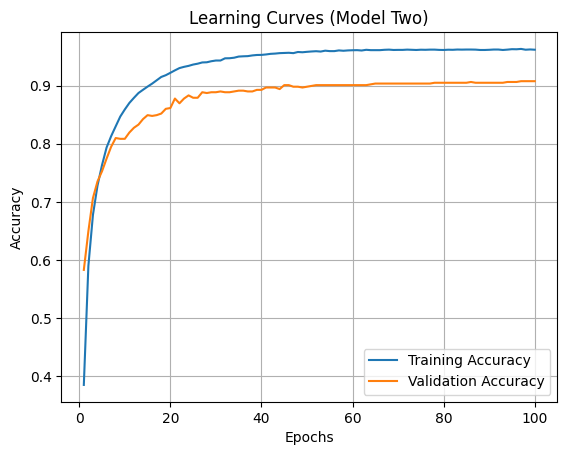

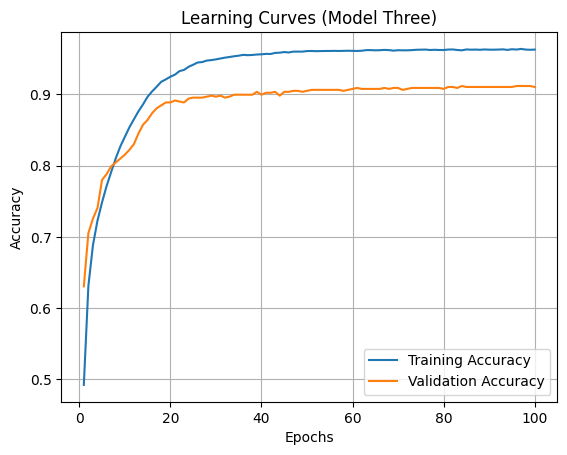

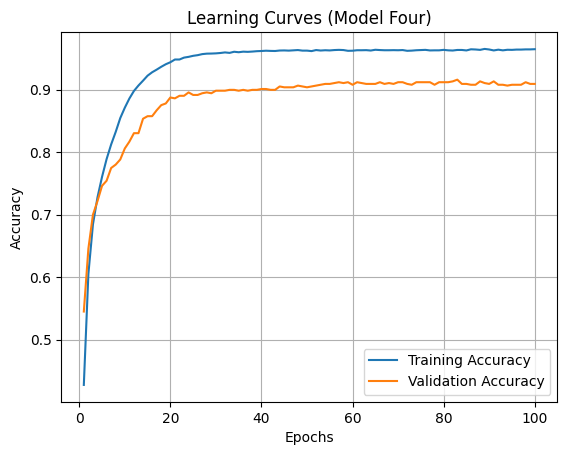

In [220]:
#histories = [history_two, history_three, history_four]
model_names = ['Model Two', 'Model Three', 'Model Four']

for model, history, model_name in zip(models, histories, model_names):
    train_errors = history.history['categorical_accuracy']
    val_errors = history.history['val_categorical_accuracy']

    epochs = range(1, len(train_errors) + 1)

    plt.plot(epochs, train_errors, label='Training Accuracy')
    plt.plot(epochs, val_errors, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Learning Curves ({})'.format(model_name))
    plt.legend()
    plt.grid()

    plt.show()


> o) Una vez terminados los entrenamientos elija la mejor red hasta ahora y entrénela con el conjunto de entrenamiento completo sin validation split.

In [221]:
ANN_four.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

history_best = ANN_four.fit(x_train, y_train_OHE,
                              batch_size=64*4,
                              epochs=100,
                              verbose=0)


> p) Procese las predicciones del modelo sobre el conjunto de test para que pueda comparar los errores usando un heatmap de la matriz de confusión.

In [222]:
y_pred = ANN_four(x_test)
y_pred = np.argmax(y_pred, axis=1)

In [223]:
y_test_comp = np.argmax(y_test_OHE, axis=1)

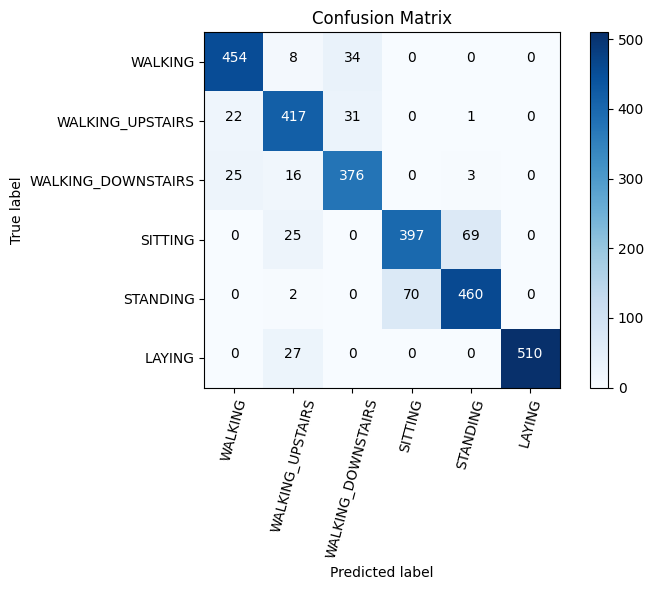

In [224]:
from sklearn.metrics import confusion_matrix

cat = np.array([1,2,3,4,5,6])

cm = confusion_matrix(cat[y_test_comp], cat[y_pred])

num_classes = 6

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, LABELS, rotation=75)
plt.yticks(tick_marks, LABELS)

thresh = cm.max() / 2.0
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


> q) Comente acerca de los resultados y explique cual es la actividad que mejor logra clasificar la red.

- La clase "laying" es la que obtiene mejores resultados, con el mayor número de predicciones correctas. Esto tiene sentido, ya que no requiere ningún movimiento y el giroscopio se encuentra en una posición específica, en comparación con, por ejemplo, "walking", donde habrá acceso y el giroscopio se moverá constantemente.
- La clase que obtiene la peor predicción es "walking downstairs", que en numerosas ocasiones se confunde con "walking" o "walking upstairs".
- También la clase "walking upstairs" se confunde con "laying", probablemente porque el giroscopio registra que el móvil está a 90 grados cuando se levanta la pierna, ya que el móvil se coloca en la cintura.

### 2.2.2 AdaBoost y arbustos

> a) Describa brevemente como funciona el modelo AdaBoost.

- Es un método de conjunto utilizado para tareas de clasificación. Lo que hace este algoritmo es construir un modelo y asignar pesos iguales a todos los puntos de datos. A continuación, asigna pesos más altos a los puntos clasificados erróneamente. Ahora todos los puntos con pesos más altos tienen más importancia en el siguiente modelo. Seguirá entrenando modelos hasta que se obtenga un error menor.

> b) ¿Qué clasificador se puede usar junto con Adaboost?

- El más común son los árboles de decisión, concretamente los tocones de decisión, que sólo tienen un nivel.

> c) ¿Cómo funciona el _learning rate_ en el modelo AdaBoost?

- Controla la contribución de cada aprendiz débil al conjunto final, de 0 a 1. Una tasa de aprendizaje más alta significa que los pesos de las instancias mal clasificadas se incrementan más en cada iteración, poniendo más énfasis en la corrección de esas instancias. Por el contrario, una tasa de aprendizaje más baja asigna actualizaciones de peso más pequeñas a las instancias mal clasificadas, lo que conduce a un ajuste más lento de los pesos.

> d) Separe el conjunto de entrenamiento dejando el 10% para validación.

> e) Entrene un clasificador AdaBoost con un arbusto (árbol de profundidad=2) con 300 estimadores y learning_rate=1

**Nota:** Este modelo no usa One Hot Encoder para las clases, investigue como preprocesar los datos del conjunto para entrenar este modelo. Puede guiarse con el siguiente tutorial de sklearn: https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_multiclass.html#sphx-glr-auto-examples-ensemble-plot-adaboost-multiclass-py



In [225]:
x_train_ada, x_val, y_train_ada, y_val = train_test_split(x_train, y_train, test_size=0.1, shuffle=True, random_state=42)

In [226]:
ada_300 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=300,
    learning_rate=1)

ada_300.fit(x_train_ada, y_train_ada)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1, n_estimators=300)

> f) Revise el error de validación con el conjunto de validaión.



In [234]:
ada_val_errors = []
ada_predict = ada_300.predict(x_val)

for ada_val_predict in ada_300.staged_predict(x_val):
    ada_val_errors.append(1.0 - accuracy_score(ada_val_predict, y_val))

print("Último error de validación:", ada_val_errors[-1])

Último error de validación: 0.17663043478260865


Text(0, 0.5, 'Validation error')

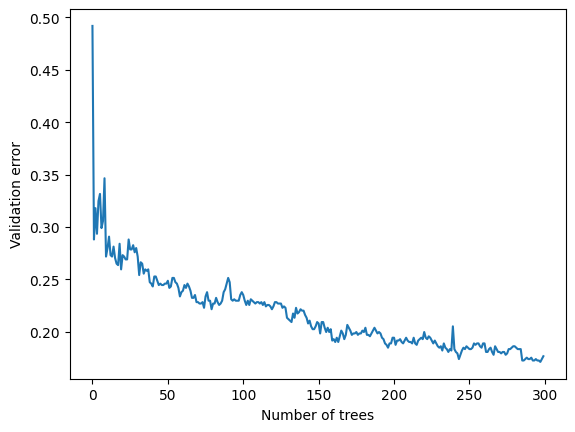

In [228]:
indices = list(range(len(ada_val_errors)))

plt.plot(indices, ada_val_errors)

plt.xlabel('Number of trees')
plt.ylabel('Validation error')

> g) Haga la misma prueba pero ahora con 30 estimadores

In [229]:
ada_30 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=30,
    learning_rate=1)

ada_30.fit(x_train_ada, y_train_ada)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1, n_estimators=30)

In [235]:
ada_val_errors = []

for ada_val_predict in ada_30.staged_predict(x_val):
    ada_val_errors.append(1.0 - accuracy_score(ada_val_predict, y_val))

print("Último error de validación:", ada_val_errors[-1])

Último error de validación: 0.2785326086956522


Text(0, 0.5, 'Validation error')

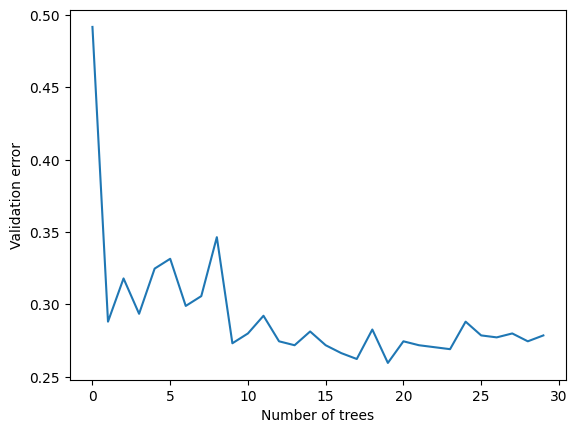

In [231]:
indices = list(range(len(ada_val_errors)))

plt.plot(indices, ada_val_errors)

plt.xlabel('Number of trees')
plt.ylabel('Validation error')

> h) Una vez encontrado el mejor modelo basandose en el error de validación, entrene el mejr modelo con todo el conjunto de entrenamiento, es decir, sin hacer _validation split_ y luego evalúe el modelo sobre el conjunto de pruebas.

In [237]:
ada_best = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=300,
    learning_rate=1)

ada_best.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1, n_estimators=300)

> i) Muestre la matriz de confusión y comente sus resultados.

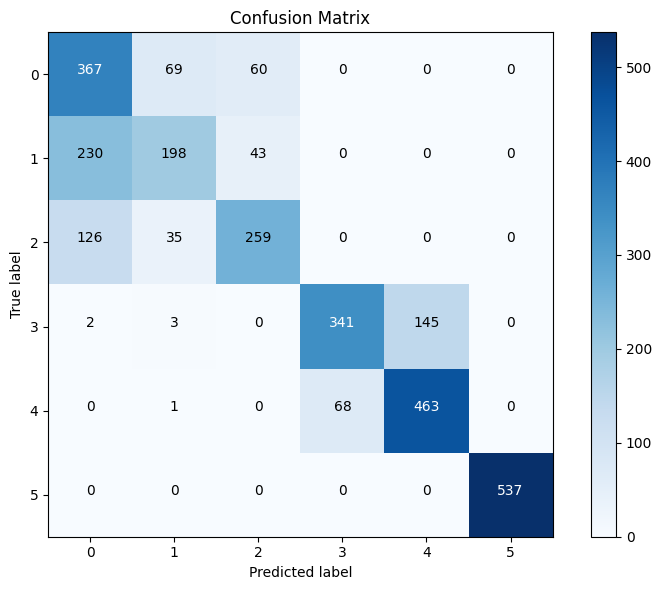

In [238]:
y_pred = ada_best.predict(x_test)
cat = np.array([1,2,3,4,5,6])

cm = confusion_matrix(y_test, y_pred)

num_classes = 6

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()


#tick_marks = np.arange(num_classes)
#plt.xticks(tick_marks, LABELS, rotation=75)
#plt.yticks(tick_marks, LABELS)

thresh = cm.max() / 2.0
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

## 2.3 Conclusiones

Comente con qué modelo obtiene los mejores resultados, ¿qué otros experimentos realizaría para intentar mejorar los resultados?



>Comparando ambas matrices de confusión, se puede apreciar como la red neuronal mostró mejores resultados en comparación a AdaBoost, a pesar de que esta última se demoró considerablemente más en su entrenamiento.

>Se pudo apreciar como ReLU da mejores resultados que usar la función sigmoidal.

>Para mejorar los resultados se podría seguir experimentando con la red neuronal, variando la cantidad de neuronas en las capas ocultas.